### Bank churn rates prediction
The dataset will be used to predict customer churn. The problem is a binary classification problem since we have a 0 or 1 target class variable, i.e. ther are two possible values

In [2]:
#importing the libraries# 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)
# Loading the dataset
customer_data = pd.read_csv('C:/Users/LUGAPEDE/Documents/data_projects/Python_scripts/projects/churn_rates/Churn_Modelling.csv')
customer_data.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
customer_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# overview of the columns
customer_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

There are various columns that will not affect the exit variable i.e
* Rownumber
* CustomerID
* Surname
We shall drop these columns



In [7]:
# dropping the column and reassing the dataframe to itself
customer_data = customer_data.drop(['RowNumber','CustomerId','Surname'], axis = 1)
customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [11]:
customer_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='Exited', ylabel='count'>

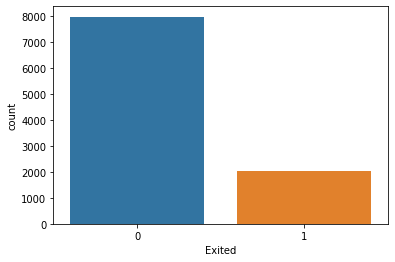

In [20]:
import warnings

sns.countplot(data = customer_data, x = customer_data['Exited'])

In [22]:
customer_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

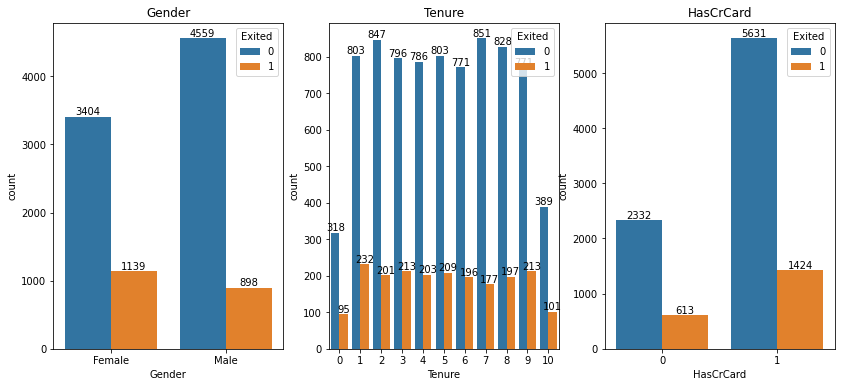

In [27]:
# numerical countplots
plt.figure(figsize=(14, 6))
for i, col in  enumerate(['Gender', 'Tenure', 'HasCrCard']):
    plt.subplot(1, 3, i + 1)
    ax = sns.countplot(data = customer_data , x = col, hue  = 'Exited')
    for j in range (len(ax.containers)):
        ax.bar_label(ax.containers[j])
    plt.title(f'{col}')
plt.show()

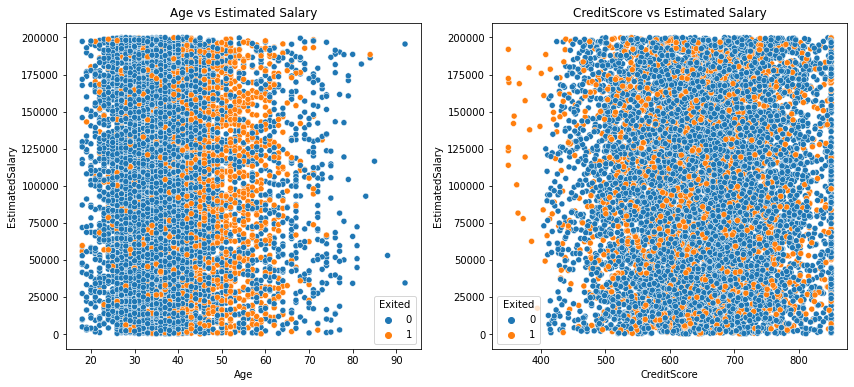

In [48]:
# relation between age, Credit score and estimatedsalary
plt.figure(figsize=(14, 6))
for i, col in enumerate(['Age', 'CreditScore']):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data= customer_data, x = col, y= 'EstimatedSalary', hue = 'Exited')
    plt.title(f'{col} vs Estimated Salary')
    
plt.show()

#### Converting Categorocal Columns to Numeric Columns

In [28]:
customer_data_2 = customer_data.drop(['Geography', 'Gender'], axis = 1)

In [32]:
# using one hot encoding for this section to avoid ordinal relationship specualtion 
#for the machine learning algorithm
geo = pd.get_dummies(customer_data.Geography) 
gender = pd.get_dummies(customer_data.Gender)

In [37]:
customer_data_2 = pd.concat([customer_data_2, geo, gender], axis = 1)
customer_data_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


#### Data Pre-Processing

The dataset is now ready for implementation so as to train our machine learning algorithm . We shall isolate the predicting class

In [39]:
x = customer_data_2.drop(['Exited'],axis = 1)
y = customer_data_2['Exited']

Dividing the data into training set and and test set . 20% will be used for testing the data and the rest to be the training.

#### -->  ML algorithm Training
The ML algorithm will be able to spot the trends in the training data.
Since this is classification problem them we shall use the Random Forest Algorithm.
#### -->  ML algorithm Evaluation
Looking at how well it performs. we shall use some common metrics such as F1 measure, precision, Recall and Accuracy
#### -->  Feature Evaluation
An analysis of what features play the most crucial part in the identification of churn. The Random Forest ClassiFier has the attribute feature importance

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size  = 0.2, random_state = 0)

In [42]:
# calling the fit method in the feature set (x) and corresponding label set (y)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 200, random_state=0)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.76      0.52      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

0.8695


The model indicates and accuracy of 86.95%, therefore the algorithm predicts the churn rate <strong>86.95%</strong>

<AxesSubplot:>

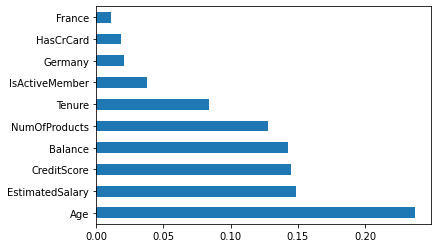

In [47]:
import_feat = pd.Series(classifier.feature_importances_, index = x.columns)
import_feat.nlargest(10).plot(kind = 'barh')

## Summary

Based on the data we see that the age has the highest impact on the customer churn , Salary and Credit Score follow.